# Inteligência Artificial
Exercícios práticos com Python

## Algoritmos de busca

### Estudo de caso - Busca em um grafo de cidades da Romênia

In [1]:
# Existem várias formas de representar um grafo computacionalmente, mas como aqui os valores são personalizados, fazemos através de classes

class Vertice: 

    def __init__(self, rotulo, distancia_objetivo): 
        self.rotulo = rotulo  # Nome da cidade
        self.visitado = False  # Para os nossos algoritmos, estamos colocando um atributo que servirá de parâmetro para sabermos se já visitamos um nó ou não
        # self.distancia_objetivo = distancia_objetivo
        self.adjacentes = []  # Lista com nós adjacentes (esses nós serão um objeto também)

    def adiciona_adjacente(self, adjacente):  # Método simples, apenas para adicionar um objeto do tipo "Adjacente" à lista de adjacentes
        self.adjacentes.append(adjacente)

    def mostra_adjacentes(self):  # Percorrendo a lista e mostrando o nome do nó adjacente e custo, para cada nó adjacente do nó atual
        for i in self.adjacentes:
            print(i.vertice.rotulo, i.custo)

In [2]:
# Classe que guardará o vértice (objeto) que é adjacente a outro, juntamente com seu custo (distância entre as duas cidades em questão, 
# a que estamos adicionando e a cidade que estará no objeto Adjacente)
# Para ficar mais claro, faremos essa adição da seguinte forma:
# cidade1.adiciona_adjacente(Adjacente(vertice=cidade2, custo=30))
# Ou seja, a cidade1 está ligada com a cidade2 e a distância entre elas é 30km.
# Lembrando que, tanto a cidade1 quanto a cidade2 são objetos da classe Vertice criados antes de usarmos essa linha de código.
# Assim, conseguimos acessar o objeto cidade2 através do objeto cidade1 (devido à lista de adjacentes, que é um atributo dos vértices)
# e continuar percorrendo o grafo, de cidade em cidade, e também observando a distância entre elas.

class Adjacente:  
    def __init__(self, vertice, custo):
        self.vertice = vertice  # Cidade que será adjacente à outra (também é do tipo "Vertice")
        self.custo = custo  # Distância entre as duas cidades

In [3]:
# Como vamos trabalhar apenas com um único grafo, não faremos métodos para adicionar uma cidade ao grafo, remover uma cidade etc,
# Tudo será definido nessa classe e, quando quisermos um grafo novo das cidades, apenas instanciamos ela.

class Grafo_Cidades_Romenia:

    # Criando as cidades em si (Vertices). 
    # Cada cidade será um atributo estático da classe (Atributo de classe). Ou seja, caso quisermos,
    # nem precisamos instanciar um objeto dessa classe para ter acesso a esses atributos.
    # perceba que esses atributos não estão dentro de um construtor, por isso são da classe.

    arad = Vertice('Arad', 366)
    zerind = Vertice('Zerind', 374)
    oradea = Vertice('Oradea', 380)
    sibiu = Vertice('Sibiu', 253)
    timisoara = Vertice('Timisoara', 329)
    lugoj = Vertice('Lugoj', 244)
    mehadia = Vertice('Mehadia', 241)
    dobreta = Vertice('Dobreta', 242)
    craiova = Vertice('Craiova', 160)
    rimnicu = Vertice('Rimnicu', 193)
    fagaras = Vertice('Fagaras', 178)
    pitesti = Vertice('Pitesti', 98)
    bucharest = Vertice('Bucharest', 0)
    giurgiu = Vertice('Giurgiu', 77)

    # Adicionando as cidades adjacentes. 
    # Aqui apenas temos um código que será executado quando a classe for DEFINIDA (não precisamos de instanciar a classe
    # para que esse código seja executado, pois ele não está dentro do construtor da classe)

    arad.adiciona_adjacente(Adjacente(zerind, 75))
    arad.adiciona_adjacente(Adjacente(sibiu, 140))
    arad.adiciona_adjacente(Adjacente(timisoara, 118))

    zerind.adiciona_adjacente(Adjacente(arad, 75))
    zerind.adiciona_adjacente(Adjacente(oradea, 71))

    oradea.adiciona_adjacente(Adjacente(zerind, 71))
    oradea.adiciona_adjacente(Adjacente(sibiu, 151))

    sibiu.adiciona_adjacente(Adjacente(oradea, 151))
    sibiu.adiciona_adjacente(Adjacente(arad, 140))
    sibiu.adiciona_adjacente(Adjacente(fagaras, 99))
    sibiu.adiciona_adjacente(Adjacente(rimnicu, 80))

    timisoara.adiciona_adjacente(Adjacente(arad, 118))
    timisoara.adiciona_adjacente(Adjacente(lugoj, 111))

    lugoj.adiciona_adjacente(Adjacente(timisoara, 111))
    lugoj.adiciona_adjacente(Adjacente(mehadia, 70))

    mehadia.adiciona_adjacente(Adjacente(lugoj, 70))
    mehadia.adiciona_adjacente(Adjacente(dobreta, 75))

    dobreta.adiciona_adjacente(Adjacente(mehadia, 75))
    dobreta.adiciona_adjacente(Adjacente(craiova, 120))

    craiova.adiciona_adjacente(Adjacente(dobreta, 120))
    craiova.adiciona_adjacente(Adjacente(pitesti, 138))
    craiova.adiciona_adjacente(Adjacente(rimnicu, 146))

    rimnicu.adiciona_adjacente(Adjacente(craiova, 146))
    rimnicu.adiciona_adjacente(Adjacente(sibiu, 80))
    rimnicu.adiciona_adjacente(Adjacente(pitesti, 97))

    fagaras.adiciona_adjacente(Adjacente(sibiu, 99))
    fagaras.adiciona_adjacente(Adjacente(bucharest, 211))

    pitesti.adiciona_adjacente(Adjacente(rimnicu, 97))
    pitesti.adiciona_adjacente(Adjacente(craiova, 138))
    pitesti.adiciona_adjacente(Adjacente(bucharest, 101))

    bucharest.adiciona_adjacente(Adjacente(fagaras, 211))
    bucharest.adiciona_adjacente(Adjacente(pitesti, 101))
    bucharest.adiciona_adjacente(Adjacente(giurgiu, 90))

Segue uma representação visual do grafo que foi criado na célula anterior:

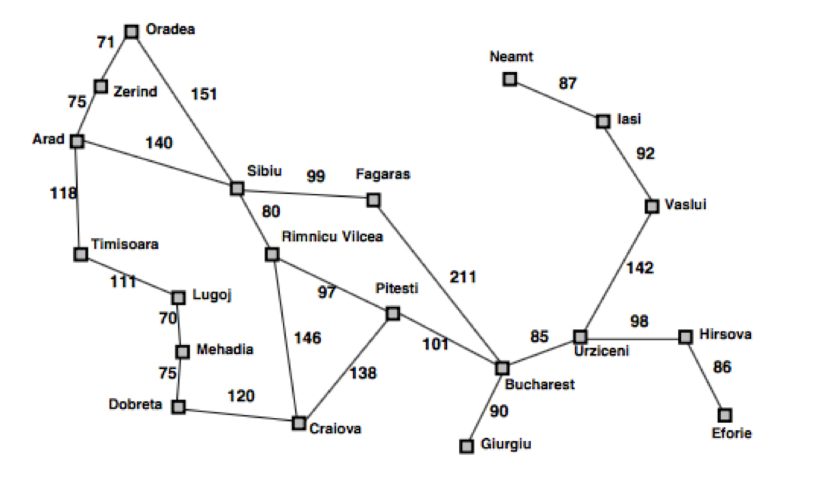

Obs: Como o problema que será estudado envolve os caminhos possíveis para ir de Arad até Bucharest, eliminamos o subgrafo das cidades à direita de Bucharest (Urziceni...), portanto não haverá Adjacentes nem Vertices com essas cidades.

In [5]:
Grafo_Cidades_Romenia.arad.mostra_adjacentes()

Zerind 75
Sibiu 140
Timisoara 118
